In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/BTT AI Studio - AllState 1C"

'Allstat1C_Milestone #3 Task Planning Assignment_Fall 2025 AI Studio.gdoc'
'AllState1C_Challenge Advisor Intro Email and Agenda Template.gdoc'
'Allstate1C_Final Presentation Hook and Outline Assignment_November_Fall 2025 AI Studio.gdoc'
'AllState1C_Milestone #1 Retrospective & Action Plan Assignment_Fall 2025 AI Studio.gdoc'
'AllState1C_Milestone #2 Task Planning Assignment_Fall 2025 AI Studio.gdoc'
'AllState1C_Project Brief and Workplan Assignment.gdoc'
'AllState1C_Project Workspaces Setup Assignment_Fall 2025 AI Studio.gdoc'
'AllState1C_Team Alliance.gdoc'
'Allstate_AI Studio Final Presentation Slide Deck Template_Fall 2025 AI Studio.gslides'
 Code
'Copy of AllState1C_Project Brief and Workplan Assignment.gdoc'
'Project Overview.gdoc'
'Weekly Updates for Eric '


In [ ]:
file_path = '/content/drive/MyDrive/BTT AI Studio - AllState 1C/Code/claims_data.csv'

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
df.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [ ]:
df.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [ ]:
df.drop('id', axis=1, inplace=True)

In [ ]:
df.isnull().any().any()

np.False_

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
cat_cols = df.select_dtypes(include='object').columns
print(len(cat_cols), "categorical columns found")

116 categorical columns found


In [ ]:
for col in cat_cols:
    print(f"{col}: {df[col].unique()[:10]}")

cat1: ['A' 'B']
cat2: ['B' 'A']
cat3: ['A' 'B']
cat4: ['B' 'A']
cat5: ['A' 'B']
cat6: ['A' 'B']
cat7: ['A' 'B']
cat8: ['A' 'B']
cat9: ['B' 'A']
cat10: ['A' 'B']
cat11: ['B' 'A']
cat12: ['A' 'B']
cat13: ['A' 'B']
cat14: ['A' 'B']
cat15: ['A' 'B']
cat16: ['A' 'B']
cat17: ['A' 'B']
cat18: ['A' 'B']
cat19: ['A' 'B']
cat20: ['A' 'B']
cat21: ['A' 'B']
cat22: ['A' 'B']
cat23: ['B' 'A']
cat24: ['A' 'B']
cat25: ['A' 'B']
cat26: ['A' 'B']
cat27: ['A' 'B']
cat28: ['A' 'B']
cat29: ['A' 'B']
cat30: ['A' 'B']
cat31: ['A' 'B']
cat32: ['A' 'B']
cat33: ['A' 'B']
cat34: ['A' 'B']
cat35: ['A' 'B']
cat36: ['A' 'B']
cat37: ['A' 'B']
cat38: ['A' 'B']
cat39: ['A' 'B']
cat40: ['A' 'B']
cat41: ['A' 'B']
cat42: ['A' 'B']
cat43: ['A' 'B']
cat44: ['A' 'B']
cat45: ['A' 'B']
cat46: ['A' 'B']
cat47: ['A' 'B']
cat48: ['A' 'B']
cat49: ['A' 'B']
cat50: ['A' 'B']
cat51: ['A' 'B']
cat52: ['A' 'B']
cat53: ['A' 'B']
cat54: ['A' 'B']
cat55: ['A' 'B']
cat56: ['A' 'B']
cat57: ['A' 'B']
cat58: ['A' 'B']
cat59: ['A' 'B']
cat60:

In [ ]:
df[cat_cols].nunique().sort_values()


,0
cat1,2
cat2,2
cat3,2
cat4,2
cat5,2
...,...
cat112,51
cat113,61
cat109,84
cat110,131


In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(len(num_cols), "numeric columns found")
print(num_cols)

15 numeric columns found
Index(['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8',
       'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14', 'loss'],
      dtype='object')


In [ ]:
df[num_cols].describe()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [ ]:
corr = df.corr(numeric_only=True)['loss'].sort_values(ascending=False)
print(corr)

loss      1.000000
cont2     0.141528
cont7     0.119799
cont3     0.111053
cont11    0.099806
cont12    0.098724
cont6     0.040967
cont8     0.030508
cont10    0.020236
cont14    0.019298
cont9     0.014456
cont13   -0.004022
cont1    -0.010237
cont5    -0.011355
cont4    -0.035831
Name: loss, dtype: float64


<Axes: xlabel='loss', ylabel='Count'>

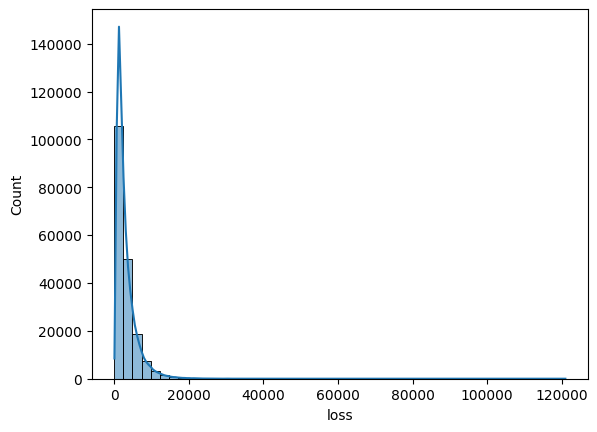

In [ ]:
sns.histplot(df['loss'], bins=50, kde=True)

In [ ]:
df['log_loss'] = np.log1p(df['loss'])

<Axes: xlabel='log_loss', ylabel='Count'>

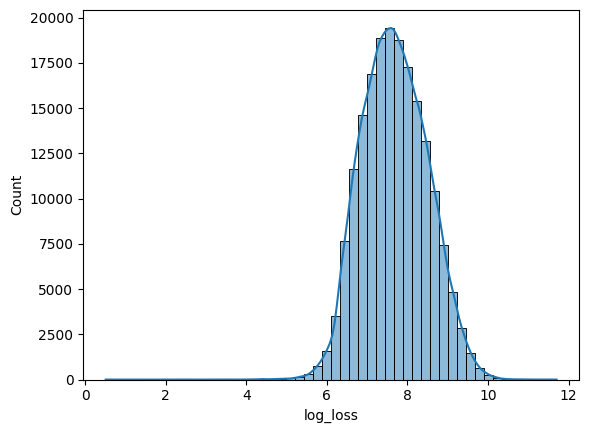

In [ ]:
sns.histplot(df['log_loss'], bins=50, kde=True)

In [ ]:
df.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss,log_loss
0,A,B,A,B,A,A,A,A,B,A,...,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18,7.702637
1,A,B,A,A,A,A,A,A,B,B,...,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60,7.158203
2,A,B,A,A,B,A,A,A,B,B,...,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09,8.008396
3,B,B,A,B,A,A,A,A,B,A,...,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85,6.846784
4,A,B,A,B,A,A,A,A,B,B,...,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85,7.924742


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from category_encoders import TargetEncoder

# 1. Drop ID column if present
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)

# 2. Define target (using log_loss for training)
target = "loss"
X = df.drop(columns=[target, 'log_loss'])
y_log = df['log_loss'] # Train on log-transformed target

# 3. Detect categorical / numerical columns
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 4. Preprocessing
preprocess = ColumnTransformer(
    transformers=[
        ("cat", TargetEncoder(), categorical_cols),
        ("num", "passthrough", numeric_cols)
    ]
)

# 5. Random Forest (TRUE RF, FAST SETTINGS)
model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("rf", RandomForestRegressor(
        n_estimators=20,     # Reduced for faster training
        max_depth=10,        # Reduced for faster training
        min_samples_split=50, # Increased for faster training
        min_samples_leaf=20,  # Increased for faster training
        n_jobs=-1,
        random_state=42
    ))
])

# 6. Train-Test Split (using y_log for training)
X_train, X_test, y_log_train, y_log_test = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

# Also get original y_test for comparison on original scale
y_test = df.loc[y_log_test.index, target]

# 7. Train Model
model.fit(X_train, y_log_train)

# 8. Evaluate on log scale and original scale
preds_log = model.predict(X_test)

# Convert predictions back to original scale
preds_original = np.expm1(preds_log) # expm1 is inverse of log1p

# Ensure predictions are non-negative
preds_original[preds_original < 0] = 0

# Metrics on Log Scale
rmse_log = np.sqrt(mean_squared_error(y_log_test, preds_log))
mse_log = mean_squared_error(y_log_test, preds_log)
mae_log = mean_absolute_error(y_log_test, preds_log)

# Metrics on Original Scale
rmse_original = np.sqrt(mean_squared_error(y_test, preds_original))
mse_original = mean_squared_error(y_test, preds_original)
mae_original = mean_absolute_error(y_test, preds_original)

print("==================================")
print("  TRUE RANDOM FOREST (FAST)")
print("==================================")
print("Log Scale:")
print(f"RMSE: {rmse_log:.4f}")
print(f"MSE: {mse_log:.4f}")
print(f"MAE: {mae_log:.4f}")
print("\nOriginal Scale:")
print(f"RMSE: {rmse_original:.4f}")
print(f"MSE: {mse_original:.4f}")
print(f"MAE: {mae_original:.4f}")

  TRUE RANDOM FOREST (FAST)
Log Scale:
RMSE: 0.5742
MSE: 0.3297
MAE: 0.4472

Original Scale:
RMSE: 2075.6080
MSE: 4308148.5444
MAE: 1226.6292


/tmp/ipython-input-3738347300.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importance.head(20).values, y=sorted_importance.head(20).index, palette='viridis')


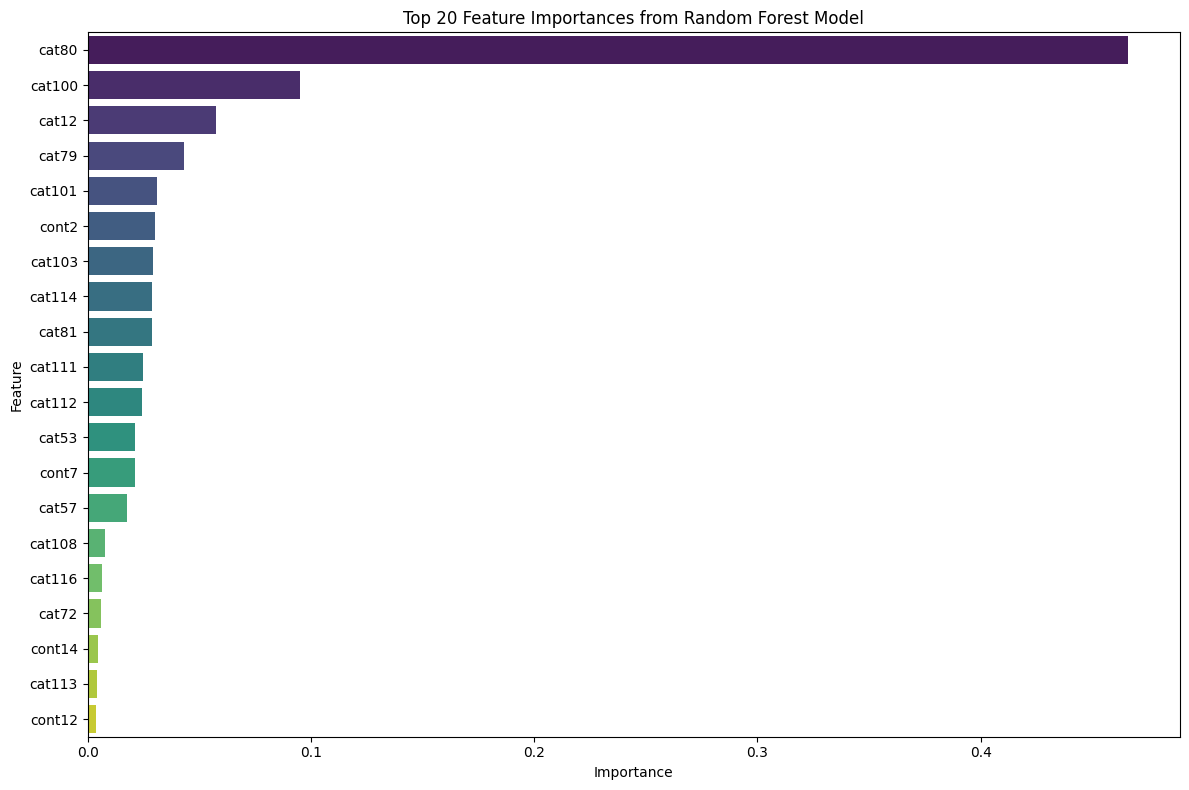

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = model.named_steps['rf'].feature_importances_

original_feature_names = X.columns.tolist()

processed_feature_names = categorical_cols + numeric_cols

# Create a pandas Series for easier sorting and plotting
importance_df = pd.Series(feature_importances, index=processed_feature_names)

# Sort the features by importance
sorted_importance = importance_df.sort_values(ascending=False)

# Plot the top N feature importances (e.g., top 20)
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_importance.head(20).values, y=sorted_importance.head(20).index, palette='viridis')
plt.title('Top 20 Feature Importances from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

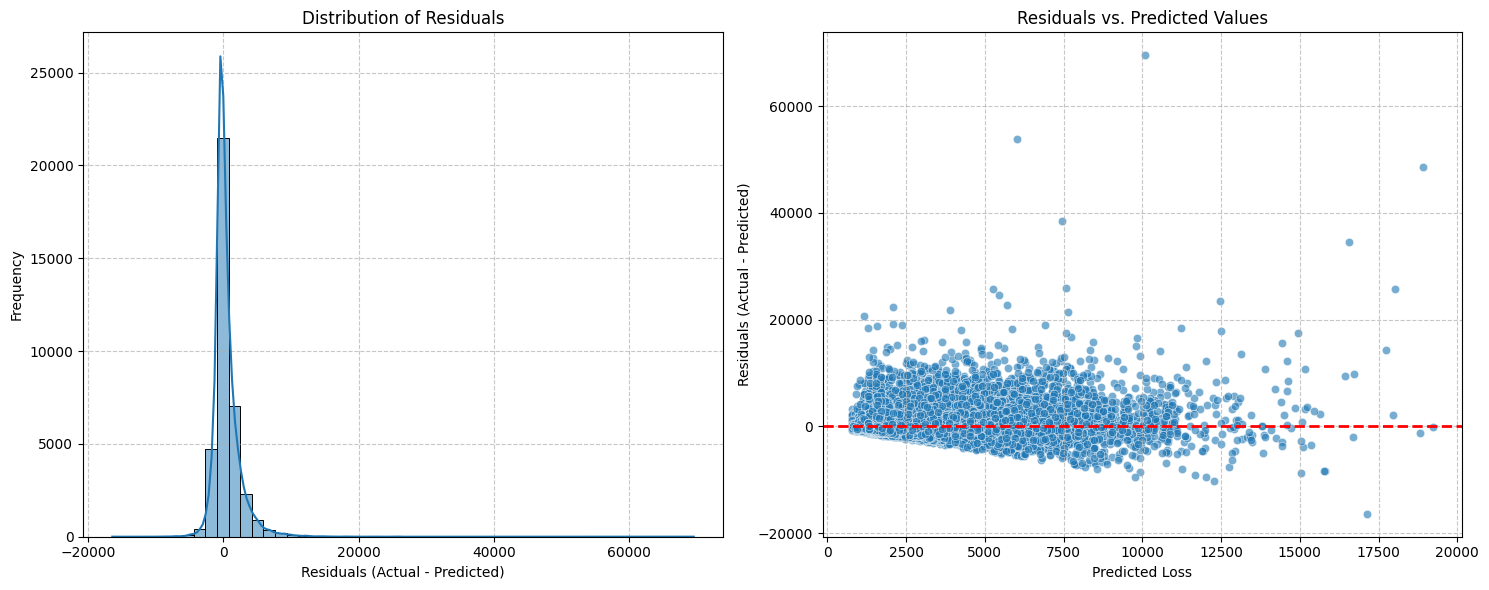

In [ ]:
residuals = y_test - preds_original

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1) # Histogram of residuals
sns.histplot(residuals, bins=50, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2) # Residuals vs. Predicted values
sns.scatterplot(x=preds_original, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', lw=2) # Zero residual line
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Loss')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

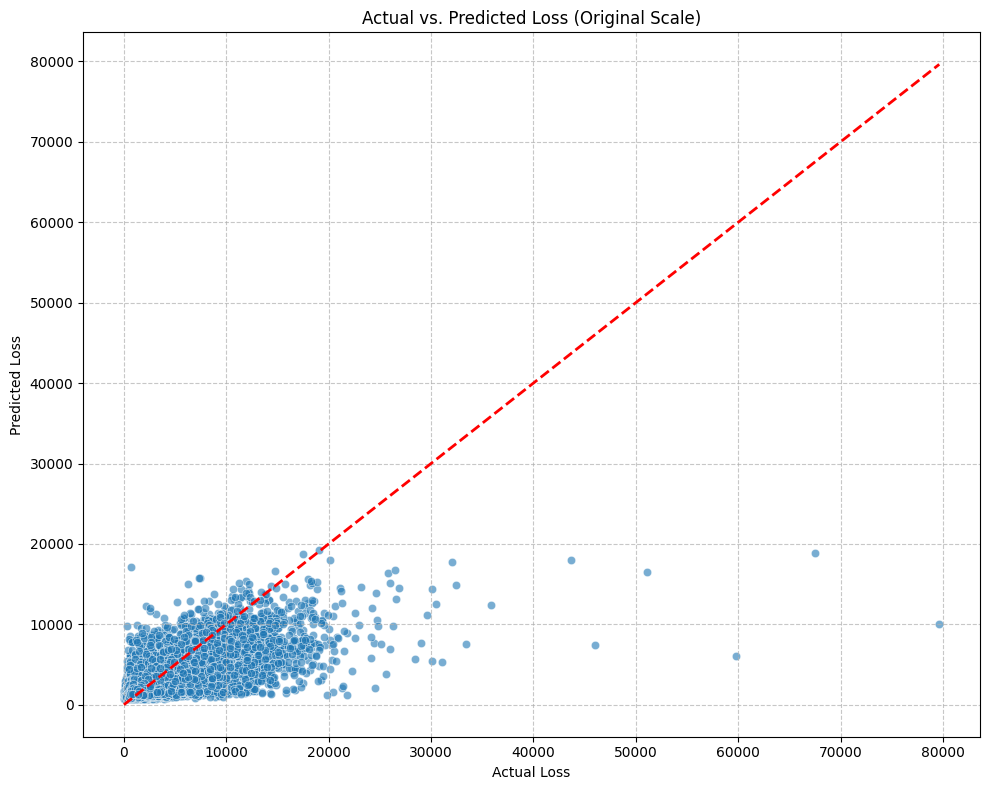

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test, y=preds_original, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # 45-degree line for perfect prediction
plt.title('Actual vs. Predicted Loss (Original Scale)')
plt.xlabel('Actual Loss')
plt.ylabel('Predicted Loss')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()